### non_tools dataset
1. random crop to the size of 64×64
2. iterately to produce 1000 images

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2

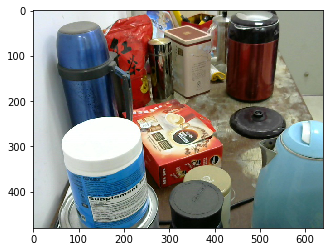

In [2]:
image = cv2.imread("original_dataset/non_tools/nontool1.jpg", cv2.IMREAD_COLOR)

plt_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(plt_img)

In [3]:
size = image.shape
print(size)

h_size = size[0]
v_size = size[1]

(480, 640, 3)


In [4]:
crop_size = 64

h_range = h_size - crop_size
v_range = v_size - crop_size

In [5]:
h_up = np.random.randint(120, h_range)
v_left = np.random.randint(0, v_range)

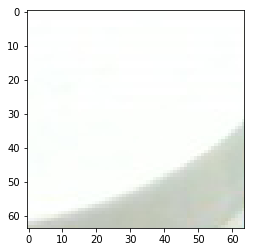

In [6]:
crop_img_plt = plt_img[h_up:h_up+64,v_left:v_left+64,:]
# crop_img.shape

plt.imshow(crop_img_plt)

In [7]:
# cv2 保存和读取都是按照 BGR，所以这里反而是错的
cv2.imwrite("crop_img_plt.jpg",crop_img_plt)

True

In [8]:
crop_img = image[h_up:h_up+64,v_left:v_left+64,:]
cv2.imwrite("crop_img_cv2.jpg",crop_img)

True

In [9]:
nontool_fnames = glob.glob('original_dataset/non_tools/*.jpg')
num_nontool = len(nontool_fnames)

print('Number of non_tool images: {}'.format(num_nontool))

Number of non_tool images: 256


In [11]:
path = "train_data/non_tools/nontool"
num_str = 0

for i in range(10):
    for j in range(num_nontool):
        
        nontool_image = cv2.imread(nontool_fnames[j], cv2.IMREAD_COLOR)
        
        h_up = np.random.randint(0, h_range)
        v_left = np.random.randint(0, v_range)
        crop_img = nontool_image[h_up:h_up+64,v_left:v_left+64,:]
        
        img_path = path + str(num_str) + ".jpg"
        cv2.imwrite(img_path, crop_img)
        
        num_str = num_str + 1

### tools dataset
1. crop manully
2. resize to the size of 64×64

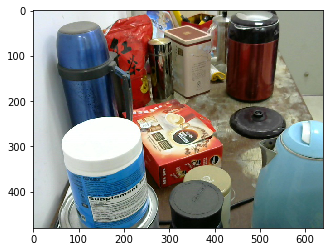

In [23]:
image = cv2.imread("original_dataset/non_tools/nontool1.jpg", cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

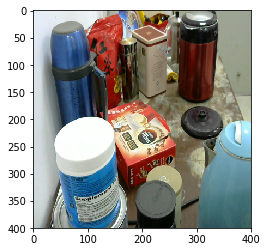

In [24]:
pic = cv2.resize(image, (400, 400), interpolation=cv2.INTER_CUBIC)
plt.imshow(pic)

In [41]:
tool_fnames = glob.glob('original_dataset/mcrop_tools/*.jpg')
num_tool = len(tool_fnames)

print('Number of tool images: {}'.format(num_tool))

Number of tool images: 1052


In [42]:
path = "train_data/tools/resize/tool"
num_str = 0

for j in range(num_tool):
        
    tool_image = cv2.imread(tool_fnames[j])
        
    resize_img = cv2.resize(tool_image, (64, 64), interpolation=cv2.INTER_CUBIC)
        
    img_path = path + str(num_str) + ".jpg"
    cv2.imwrite(img_path, resize_img)
        
    num_str = num_str + 1

In [45]:
path = "train_data/tools/crop/tool"
tool_fnames = glob.glob('train_data/tools/resize/*.jpg')
num_str = len(tool_fnames)


for j in range(num_tool):
    tool_image = cv2.imread(tool_fnames[j])
    
    shift_up = np.random.randint(0, 6)
    shift_left = np.random.randint(0, 6)
    
    crop_img = tool_image[shift_up:shift_up+58,shift_left:shift_left+58,:]
    resize_img = cv2.resize(crop_img, (64, 64), interpolation=cv2.INTER_CUBIC)
    
    img_path = path + str(num_str) + ".jpg"
    cv2.imwrite(img_path, resize_img)
    
    num_str = num_str + 1

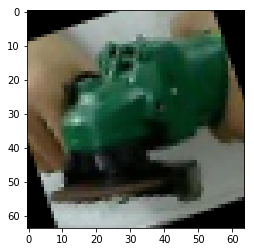

In [53]:
img = cv2.imread('train_data/tools/resize/tool1.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows,cols = img.shape[0:2]

deg = np.random.randint(-90, 90)
M = cv2.getRotationMatrix2D((cols/2,rows/2),deg,1)
dst = cv2.warpAffine(img,M,(cols,rows))

plt.imshow(dst)

In [59]:
path = "train_data/tools/rotate/tool"
tool_fnames = glob.glob('train_data/tools/resize/*.jpg')
num_str_rot = 2 * len(tool_fnames)

for j in range(num_tool):
    tool_image = cv2.imread(tool_fnames[j])
    rows,cols = tool_image.shape[0:2]
    
    deg = np.random.randint(-30, 30)
    M = cv2.getRotationMatrix2D((cols/2,rows/2),deg,1)
    dst_img = cv2.warpAffine(tool_image,M,(cols,rows))
    
    img_path = path + str(num_str_rot) + ".jpg"
    cv2.imwrite(img_path, dst_img)
    
    num_str_rot = num_str_rot + 1